### 3-Dimensional Plotting in Matplotlib

3-dimensional plots are enabled by importing the `mplot3d` toolkit, included with the main Matplotlib installation:

In [16]:
from mpl_toolkits import mplot3d

Once this submodule is imported, a 3-dimensional axes can be created by passing the keyword `projection='3d'` to any of the normal axes creation routines:

In [17]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

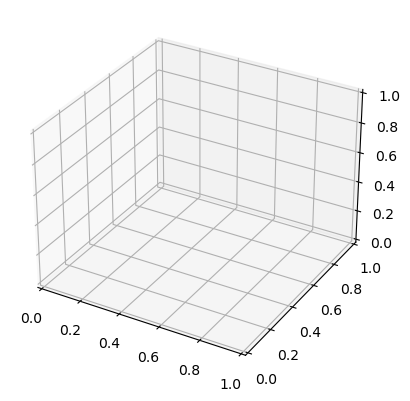

In [3]:
fig = plt.figure()
ax = plt.axes(projection='3d')

With this 3-dimensional axes enabled, we can now plot a variety of 3-dimensional plot types. 3-dimensional plotting is one of the functionalities that benefits immensely from viewing figures interactively rather than statically in the notebook. Recall that to use interactive figures, you can use `%matplotlib notebook` rather than `%matplotlib inline` when running this code.

### 3-Dimensional Points and Lines

The most basic 3-dimensional plot is a line or collection of scatter plots created from sets of (x, y, z) triples. In analogy with the more common 2-dimensional plots discussed earlier, these can be created using the `ax.plot3D` and `ax.scatter3D` functions. The call signature for these is nearly identical to that of their 2-dimensional counterpart. Here we'll plot a trigonometric spiral, along with some points drawn randomly near the line:

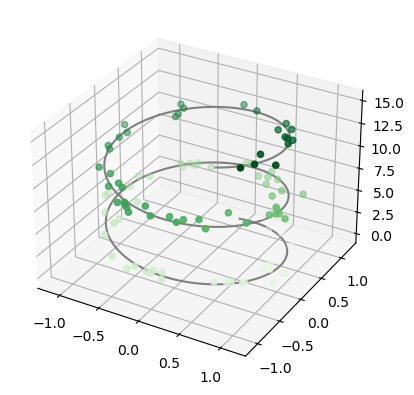

In [18]:
ax = plt.axes(projection='3d')

# data for a 3-dimensional line
zline = np.linspace(0, 15, 1000)
xline = np.sin(zline)
yline = np.cos(zline)
ax.plot3D(xline, yline, zline, 'gray')

# data for 3-dimensional scattered points
zdata = 15 * np.random.random(100)
xdata = np.sin(zdata) + 0.1 * np.random.randn(100)
ydata = np.cos(zdata) + 0.1 * np.random.randn(100)
ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='Greens')

Notice that by default, the scatter points have their transparency adjusted to give a sense of depth on the page. While the 3-dimensional effect is sometimes difficult to see within a static image, an interactive view can lead to some nice intuition about the layout of the points.

In [19]:
%matplotlib notebook

<IPython.core.display.Javascript object>


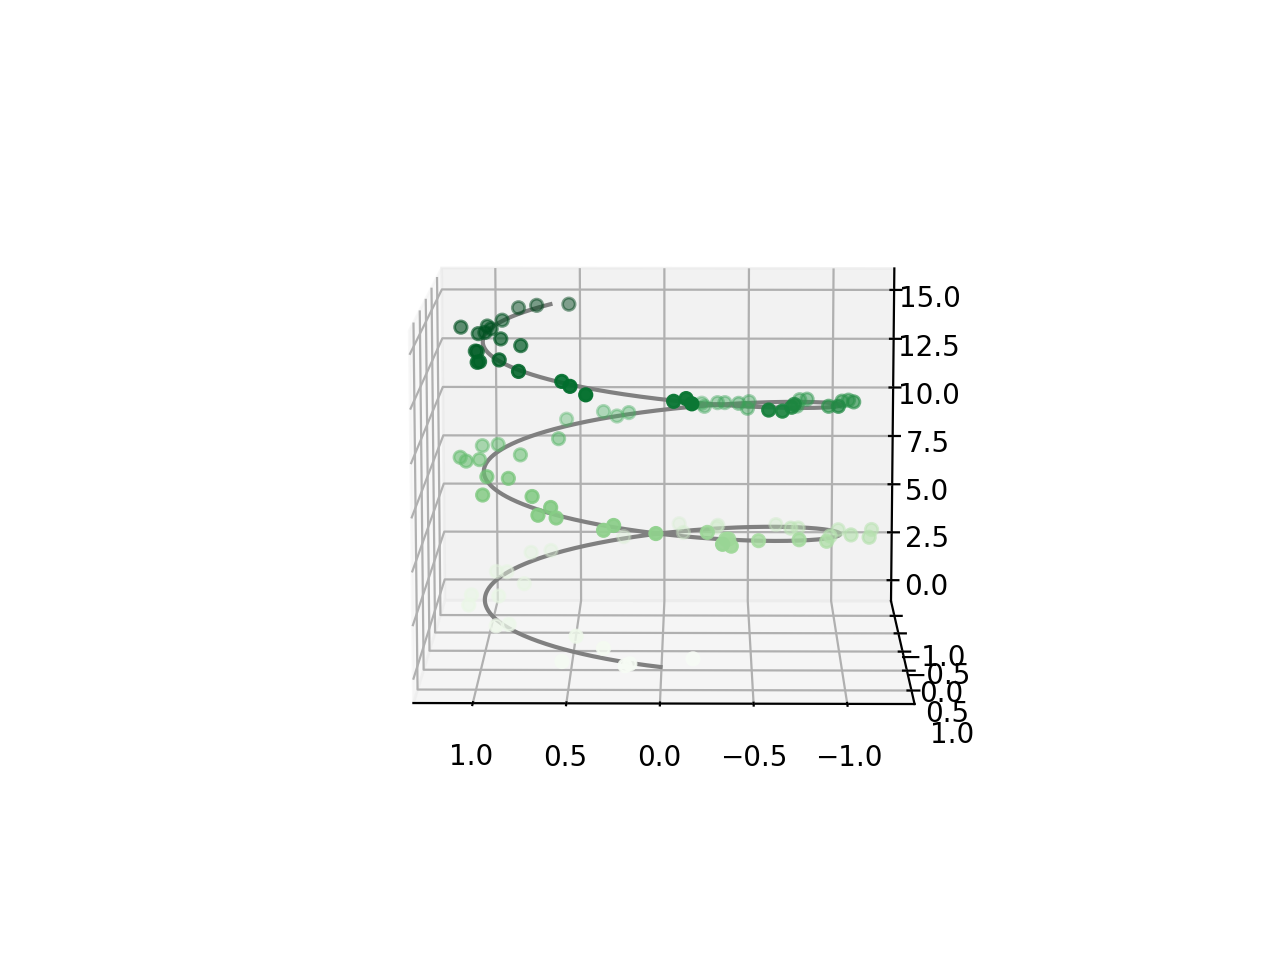

In [20]:
ax = plt.axes(projection='3d')

# data for a 3-dimensional line
zline = np.linspace(0, 15, 1000)
xline = np.sin(zline)
yline = np.cos(zline)
ax.plot3D(xline, yline, zline, 'gray')

# data for 3-dimensional scattered points
zdata = 15 * np.random.random(100)
xdata = np.sin(zdata) + 0.1 * np.random.randn(100)
ydata = np.cos(zdata) + 0.1 * np.random.randn(100)
ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='Greens')

### 3-Dimensional Contour Plots

Analogous to the contour plots we explored earlier, `mplot3d` contains tools to create 3-dimensional relief plots using the same inputs. Like 2-dimensional `ax.contour` plots, `ax.contour3D` requires all of the input data to be in the form of 2-dimensional regular grids, with the Z data evaluated at each point. Here we'll show a 3-dimensional contour diagram of a 3-dimensional sinusoidal function:

In [22]:
def f(x, y):
    return np.sin(np.sqrt(x ** 2 + y ** 2))

x = np.linspace(-6, 6, 30)
y = np.linspace(-6, 6, 30)

X, Y = np.meshgrid(x, y)
Z = f(X, Y)

Text(0.5, 0, 'z')

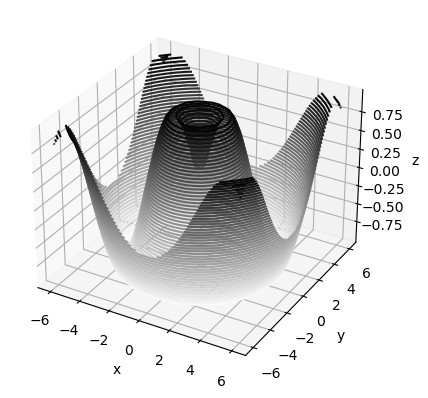

In [23]:
%matplotlib inline
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z, 50, cmap='binary')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

Sometimes the default viewing angle is not optimal, in which case we can use the `view_init` method to set the elevation and azimuthal angles. In the following example, we'll use an elevation of 60 degrees (that is, 60 degrees above the x-y plane) and an azimuth of 35 degrees (that is, rotated 35 degrees counter-clockwise about the z-axis):

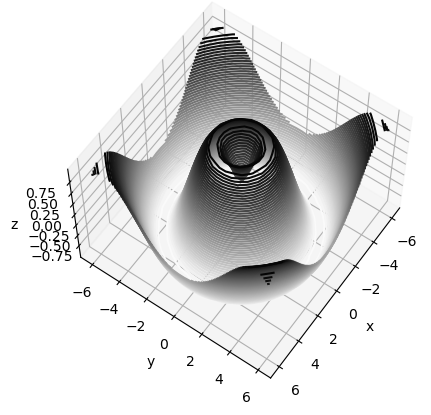

In [9]:
ax.view_init(60, 35)
fig

Again, note that this type of rotation can be accomplished interactively by clicking and dragging when using one of Matplotlib's interactive backends.

<IPython.core.display.Javascript object>


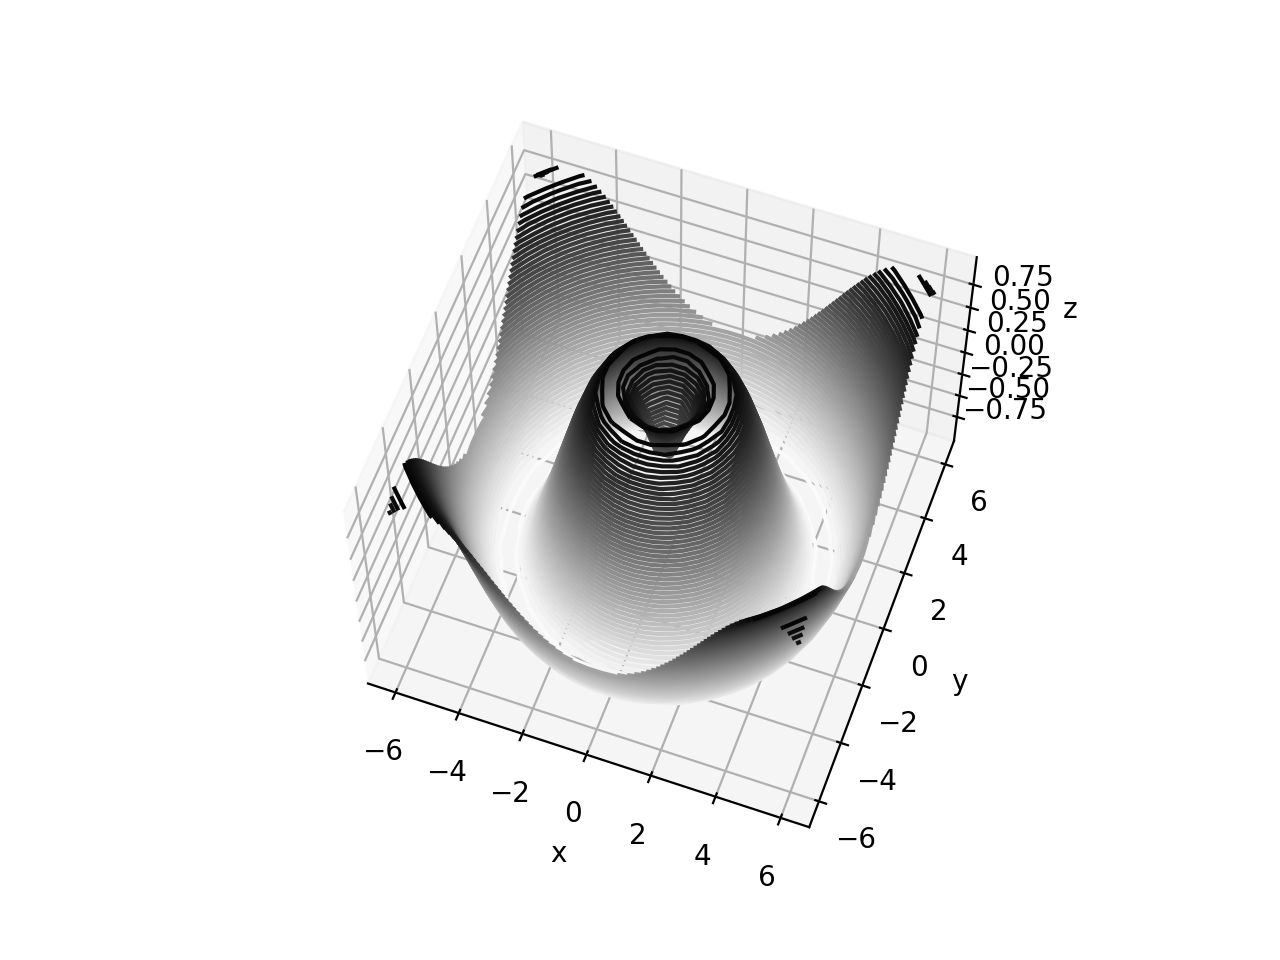

Text(0.5, 0, 'z')

In [24]:
%matplotlib notebook
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z, 50, cmap='binary')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

### Wireframes and Surface Plots

2 other types of 3-dimensional plots that work on gridded data are wireframes and surface plots. These take a grid of values and project it onto the specified 3-dimensional surface, and can make the resulting 3-dimensional forms quite easy to visualize:

Text(0.5, 0.92, 'wireframe')

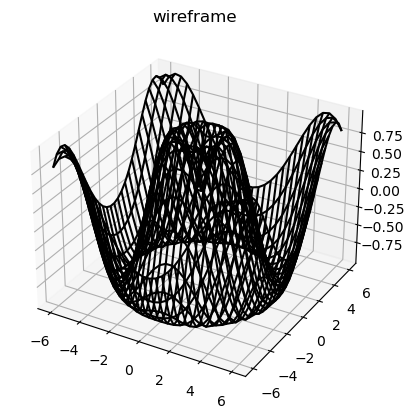

In [25]:
%matplotlib inline
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_wireframe(X, Y, Z, color='black')
ax.set_title('wireframe')

A surface plot is like a wireframe plot, but each face of the wireframe is a filled polygon. Adding a colormap to the filled polygons can aid perception of the topology of the surface being visualized:

Text(0.5, 0.92, 'surface')

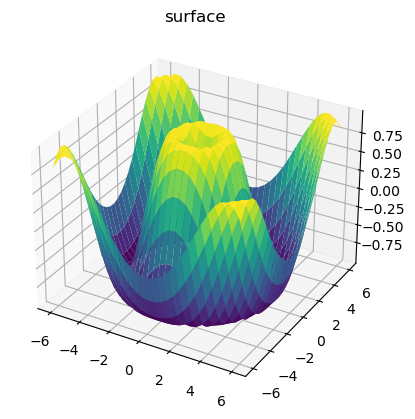

In [29]:
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')
ax.set_title('surface')

Note that though the grid of values for a surface plot needs to be 2-dimensional, it need not be rectilinear. Here is an example of creating a partial polar grid, which when used with the `surface3D` plot can give us a slice into the function we're visualizing:

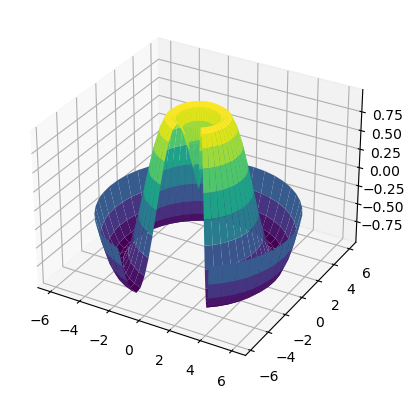

In [13]:
r = np.linspace(0, 6, 20)
theta = np.linspace(-0.9 * np.pi, 0.8 * np.pi, 40)
r, theta = np.meshgrid(r, theta)

X = r * np.sin(theta)
Y = r * np.cos(theta)
Z = f(X, Y)

ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')